In [1]:
import numpy as np
import numpy.linalg as la


In [2]:
def barycentric_coords(vertices, point):
    T = (np.array(vertices[:-1])-vertices[-1]).T
    v = np.dot(la.inv(T), np.array(point)-vertices[-1])
    v.resize(len(vertices))
    v[-1] = 1-v.sum()
    return v

---

### Plot 1

In [3]:
#dx = 153 / 1.338 # 114.34977578475336
#dy = 206 / 1.577 # 130.62777425491439

d = 172.34


def mapX(_x):
    return (_x  * d)

def mapY(_y):
    return 474 - (_y * d)

In [4]:
aX= mapX(2.299)
aY= mapY(1.651)

bX= mapX(0.596)
bY= mapY(1.286)

cX= mapX(1.292)
cY= mapY(0.952)


pX1 = mapX(1.86)
pY1 = mapY(1.38)

pX2 = mapX(0.94)
pY2 = mapY(1.24)


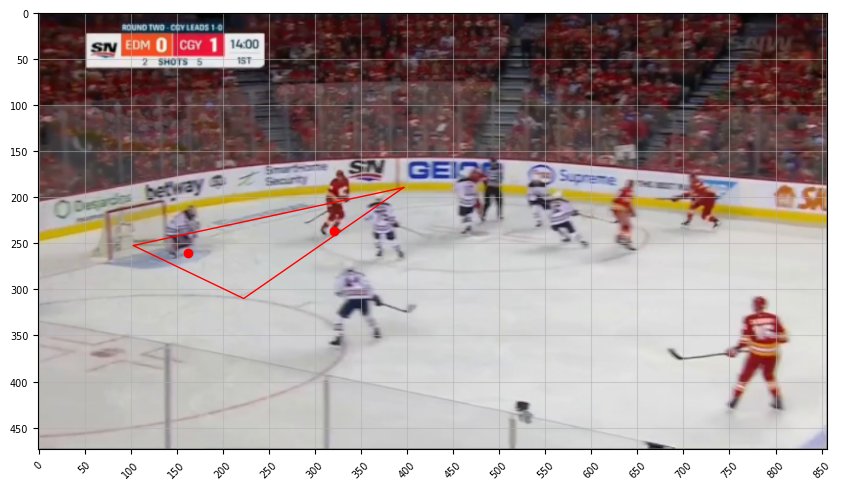

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["figure.autolayout"] = True
fig.set_dpi(100)

major_ticks = np.arange(0, 860, 50)
minor_ticks = np.arange(0, 474, 50)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.xticks(fontsize=7,rotation = 45)
plt.yticks(fontsize=7)
ax.grid(which='both', alpha=0.5)
coords = []


img = plt.imread("../data/games-captures/game-b-001_frame-775.png")
ax.imshow(img)

x = [aX,bX, cX, aX]
y = [aY,bY,cY,aY]
ax.plot(x, y, '-', linewidth=1, color='red')

x = [pX1, pX2]
y = [pY1, pY2]


ax.plot(x, y, '.', color='red', markersize=12 )

ax.imshow(img)

plt.savefig('./output/002.1_game-b-001_frame-775_plot.png')


### Coordenates

In [9]:
bCoords1 = barycentric_coords([ [aX, aY],[bX, bY],[cX, cY]], [pX1,pY1])
bCoords2 = barycentric_coords([ [aX, aY],[bX, bY],[cX, cY]], [pX2,pY2])

bCoords1, bCoords2

(array([0.59258035, 0.04127645, 0.3661432 ]),
 array([0.10072408, 0.65147866, 0.24779727]))

### Plot 2

In [10]:
AX=40
AY=0

BX=30
BY=145

CX=100
CY=170


X1 = bCoords1[0]*AX + bCoords1[1]*BX + bCoords1[2]*CX
Y1 = bCoords1[0]*AY + bCoords1[1]*BY + bCoords1[2]*CY

X2 = bCoords2[0]*AX + bCoords2[1]*BX + bCoords2[2]*CX
Y2 = bCoords2[0]*AY + bCoords2[1]*BY + bCoords2[2]*CY

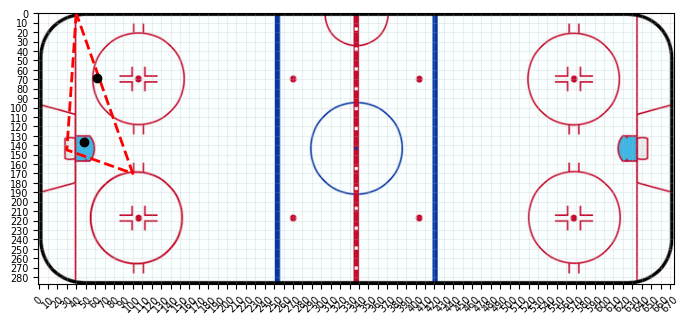

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#fig.set_size_inches(18.5, 10.5)
plt.rcParams["figure.figsize"] = (7,3.7)
plt.rcParams["figure.autolayout"] = True
fig.set_dpi(100)

major_ticks = np.arange(0, 1900, 10)
minor_ticks = np.arange(0, 800, 10)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

plt.xticks(fontsize=7,rotation = 45)
plt.yticks(fontsize=7)

ax.grid(which='both', alpha=0.2)


img = plt.imread("./assets/NHL_Hockey_Rink.png")

ax.imshow(img)

x = [AX,BX, CX, AX]
y = [AY,BY,CY,AY]
ax.plot(x, y, '--', linewidth=2, color='red')

x = [X1, X2]
y = [Y1, Y2]

ax.plot(x, y, '.', linewidth=2, color='black', markersize=12)

ax.imshow(img)
plt.savefig('./output/002.1_game-b-001_frame-775_plot-1.png')

## Is point in triangle

In [9]:
class Vector:
    def __init__(self, x, y):
        self.x = x
        self.y = y


In [10]:
def isPointInTriangle(p, p0, p1, p2):
    dX = p.x-p2.x;
    dY = p.y-p2.y;
    dX21 = p2.x-p1.x;
    dY12 = p1.y-p2.y;
    D = dY12*(p0.x-p2.x) + dX21*(p0.y-p2.y);
    s = dY12*dX + dX21*dY;
    t = (p2.y-p0.y)*dX + (p0.x-p2.x)*dY;
    if D<0:
        return s<=0 and t<=0 and s+t>=D;
    return s>=0 and t>=0 and s+t<=D;


In [11]:
a = Vector( 45.46, 246.01)
b = Vector( 195.42, 71)
c = Vector( 320.48, 195.97)

p = Vector( 270.29, 107.38)

In [12]:
isPointInTriangle(p, a, b, c)

False